In [1]:
#continues=any number is continues valu-1,2,3,4,1.4,1.3,1.5(int and float type number)
#discrete=just number which is int type-1,2,3,4,5

In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import warnings as wr 
wr.filterwarnings('ignore')

In [3]:
df= pd.read_excel('house rent area, rent.xlsx')

In [4]:
df.head() 

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [5]:
df.shape

(60, 2)

Text(0.5, 1.0, 'dhaka rent table')

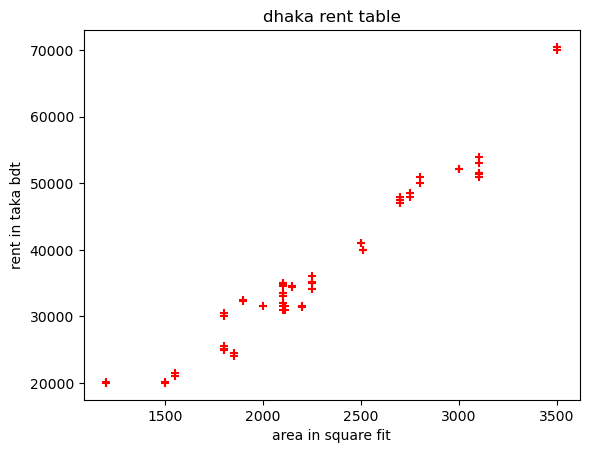

In [6]:
plt.scatter(df.area ,df.rent ,color='red' ,marker='+' )
plt.xlabel("area in square fit")
plt.ylabel("rent in taka bdt")
plt.title ('dhaka rent table')

In [7]:
x = df.drop('rent', axis=1)
y = df[['rent']]

In [8]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [9]:
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [10]:
y.shape

(60, 1)

In [11]:
x.mean()

area    2289.0
dtype: float64

In [12]:
y.mean()

rent    37269.166667
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train ,test = train_test_split(df, test_size =.25)

In [15]:
train.shape

(45, 2)

In [16]:
test.shape

(15, 2)

In [17]:
train.head()

,area,rent
19,2700,47000
1,2100,35000
29,3100,51400
3,2250,36100
45,3100,51000


In [18]:
test.head()

,area,rent
44,2250,35000
26,2750,48000
55,3100,54000
41,2100,32020
43,2510,40000


# Seperate

In [19]:
xtrain ,xtest,ytrain , ytest  = train_test_split(x,y ,test_size =.25 , random_state=4)

In [20]:
train.shape

(45, 2)

In [21]:
test.shape

(15, 2)

In [22]:
xtrain.head()

,area
26,2750
16,1800
17,1550
22,3500
33,2250


In [23]:
ytrain.head()

,rent
26,48000
16,30500
17,21000
22,70000
33,35100


In [24]:
#df[1:20]

In [25]:
#df[21:100]

# Linear Regression

In [26]:
# https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(xtrain, ytrain) #training the model

LinearRegression()

In [29]:
m =lr.coef_
m

array([[21.10926393]])

In [30]:
c=lr.intercept_
c

array([-10741.43372317])

In [31]:
yp=(m*3000)+c
yp

array([[52586.35807442]])

In [32]:
yp=(m*4000)+c
yp

array([[73695.62200694]])

In [33]:
lr.predict([[4000]])

array([[73695.62200694]])

In [34]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [43]:
df['predicted_rent'] =lr.predict(x)
df.head()

,area,rent,predicted_Rent,predicted_rent
0,2000,31500,31477.094142,31477.094142
1,2100,35000,33588.020535,33588.020535
2,2500,41050,42031.726108,42031.726108
3,2250,36100,36754.410125,36754.410125
4,3000,52100,52586.358074,52586.358074


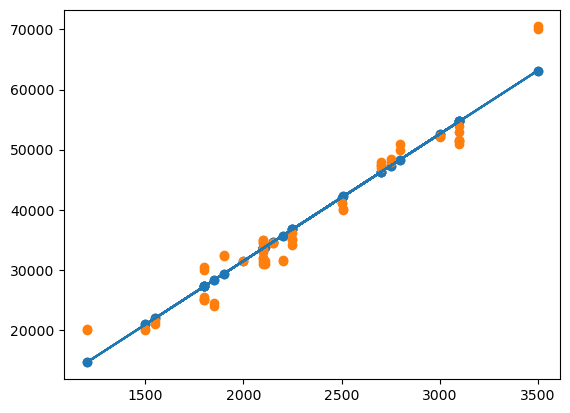

In [44]:
plt.plot(x, df[['predicted_rent']])      # plt.plot(x.squeeze(), df[['predicted_rent']])
plt.scatter(x, df[['predicted_rent']])
plt.scatter(x, df[['rent']])

In [46]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [47]:
mse=mean_squared_error(ytest , lr.predict(xtest))
mae=mean_absolute_error(ytest,lr.predict(xtest))

In [48]:
mse

5954989.619862868

In [49]:
mae

2123.6542518274086